In [1]:
import numpy as np
import pandas as pd
import sklearn

In [33]:
data = pd.read_csv("Del_deets.txt")
data.to_csv("Delivery_details.csv",index=None)
df = pd.read_csv("Delivery_details.csv",delimiter="\t")
df.shape

(26127, 59)

In [34]:
df.columns

Index(['FixtureId', 'InningId', 'InningNumber', 'OverNumber', 'Id',
       'InningOverId', 'BattingPlayerId', 'NonStrikeBattingPlayerId',
       'BallNumber', 'BowlerPlayerId', 'ShotAngle', 'ShotMagnitude',
       'Position', 'RunsScored', 'IsWicket', 'DismissalTypeId',
       'DismissalPlayerId', 'IsWide', 'IsNoBall', 'IsByes', 'IsLegByes',
       'LengthTypeId', 'LineTypeId', 'BallDateTime', 'IsAirControlled',
       'IsAppeal', 'AppealDismissalTypeId', 'BattingConnectionId',
       'BattingFeetId', 'BattingShotTypeId', 'BowlingDetailId',
       'BowlingFromId', 'BowlingTypeId', 'BowlingHandId', 'BattingHandId',
       'DecisionOfficialId', 'IsFreeHit', 'IsNewBall', 'IsPowerPlay',
       'IsBattingPowerPlay', 'IsFloodLit', 'IsReferred', 'OutcomeId',
       'ReferralOutcomeId', 'TeamRuns', 'CreateFeedId', 'UpdateFeedId',
       'SitecoreId', 'OptaId', 'RunsByes', 'RunsConceded', 'RunsWide',
       'RunsLegByes', 'NoBallsCount', 'FieldingPosition', 'NoBallReasonId',
       'IsBoundry',

In [35]:
del df["IsDelete"]
del df["NoBallReasonId"]
del df["IsBoundry"]
del df["IsAirNotControlled"]


In [36]:
#df.isnull().sum()
del df["Position"]
del df["DismissalTypeId"]
del df["DismissalPlayerId"]
del df["UpdateFeedId"]
del df["SitecoreId"]
del df["OptaId"]
del df["CreateFeedId"]
df.isnull().sum()

FixtureId                     0
InningId                      0
InningNumber                  0
OverNumber                    0
Id                            0
InningOverId                  0
BattingPlayerId              53
NonStrikeBattingPlayerId    135
BallNumber                    0
BowlerPlayerId              135
ShotAngle                   135
ShotMagnitude               135
RunsScored                  135
IsWicket                      0
IsWide                      135
IsNoBall                    135
IsByes                      135
IsLegByes                   135
LengthTypeId                135
LineTypeId                  135
BallDateTime                135
IsAirControlled             135
IsAppeal                    135
AppealDismissalTypeId       135
BattingConnectionId         135
BattingFeetId               135
BattingShotTypeId           135
BowlingDetailId             135
BowlingFromId               135
BowlingTypeId               135
BowlingHandId               135
BattingH

In [37]:
df["FieldingPosition"] = df["FieldingPosition"].fillna(value="0")

In [38]:
df["FieldingPosition"].unique()

array(['Wicketkeeper', '0', 'Bowler', 'Cover', 'Extra Cover',
       'Backward Square Leg', 'Mid Off', 'Gully', 'Point', 'Third Man',
       'Square Leg', 'Fine Leg', 'Deep Point', 'Short Leg',
       'Deep Backward Square Leg', 'Deep Backward Point', 'Mid On',
       'Deep Mid Wicket', 'Short Third Man', 'Deep Cover', 'Mid Wicket',
       'Deep Extra Cover', 'Silly Mid Off', 'Deep Square Leg', 'Long On',
       'Backward Point', 'Short Mid Wicket', 'Short Fine Leg',
       'Short Extra Cover', 'Long Off', 'Silly Mid On', 'Silly Point',
       'Leg Gully', 'Third Slip', 'Fourth Slip', 'Leg Slip', 'First Slip',
       'Second Slip', '-'], dtype=object)

In [39]:
df[df.FieldingPosition=="-"] = "0"

In [40]:
df["FieldingPosition"].unique()

array(['Wicketkeeper', '0', 'Bowler', 'Cover', 'Extra Cover',
       'Backward Square Leg', 'Mid Off', 'Gully', 'Point', 'Third Man',
       'Square Leg', 'Fine Leg', 'Deep Point', 'Short Leg',
       'Deep Backward Square Leg', 'Deep Backward Point', 'Mid On',
       'Deep Mid Wicket', 'Short Third Man', 'Deep Cover', 'Mid Wicket',
       'Deep Extra Cover', 'Silly Mid Off', 'Deep Square Leg', 'Long On',
       'Backward Point', 'Short Mid Wicket', 'Short Fine Leg',
       'Short Extra Cover', 'Long Off', 'Silly Mid On', 'Silly Point',
       'Leg Gully', 'Third Slip', 'Fourth Slip', 'Leg Slip', 'First Slip',
       'Second Slip'], dtype=object)

In [41]:
from sklearn.preprocessing import OrdinalEncoder
data = df["FieldingPosition"]
d = data.to_numpy().reshape(-1,1)
print(d)
encoder = OrdinalEncoder()
result = encoder.fit_transform(d)
print(result)

[['Wicketkeeper']
 ['0']
 ['0']
 ...
 ['Wicketkeeper']
 ['Deep Mid Wicket']
 ['Deep Point']]
[[37.]
 [ 0.]
 [ 0.]
 ...
 [37.]
 [ 9.]
 [10.]]


In [42]:
r = result.reshape(1,-1)
df["FieldingPosition"] = result

In [43]:
df["FieldingPosition"]

0        37.0
1         0.0
2         0.0
3         3.0
4         4.0
         ... 
26122     0.0
26123    37.0
26124    37.0
26125     9.0
26126    10.0
Name: FieldingPosition, Length: 26127, dtype: float64

In [44]:
df.head(20)

,FixtureId,InningId,InningNumber,OverNumber,Id,InningOverId,BattingPlayerId,NonStrikeBattingPlayerId,BallNumber,BowlerPlayerId,...,IsReferred,OutcomeId,ReferralOutcomeId,TeamRuns,RunsByes,RunsConceded,RunsWide,RunsLegByes,NoBallsCount,FieldingPosition
0,9606,10546,1,1,1555910,326859,374.0,1156.0,1,661.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,37.0
1,9606,10546,1,1,1555911,326859,374.0,1156.0,1,661.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9606,10546,1,1,1555914,326859,1146.0,1156.0,2,661.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9606,10546,1,1,1555918,326859,1047.0,1156.0,3,661.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,9606,10546,1,1,1555919,326859,1047.0,1156.0,4,661.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5,9606,10546,1,1,1555921,326859,1047.0,1156.0,5,661.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
6,9606,10546,1,1,1555923,326859,1047.0,1156.0,6,661.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,37.0
7,9606,10546,1,1,1555924,326859,1047.0,1156.0,6,661.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
8,9606,10546,1,2,1555927,326862,1156.0,1047.0,1,3806.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
9,9606,10546,1,2,1555930,326862,1156.0,1047.0,2,3806.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,37.0


In [45]:
df.dropna(inplace=True)
print(df.shape)

(25992, 48)


In [46]:
df.to_csv("Delivery_details.csv",index=None)

In [47]:
del df["Id"]
del df["InningOverId"]
del df["BallDateTime"]
del df["IsAirControlled"]
del df["IsAppeal"]
del df["AppealDismissalTypeId"]
del df["BattingConnectionId"]
#del df["BattingFeetId"]
#del df["BattingShotTypeId"]
#del df["BowlingDetailId"]
#del df["BowlingFromId"]
del df["IsNewBall"]
del df["NoBallsCount"]
#del df["IsReferred"]

In [48]:
df.to_csv("Delivery_details.csv",index=None)

In [49]:
df.count()

FixtureId                   25992
InningId                    25992
InningNumber                25992
OverNumber                  25992
BattingPlayerId             25992
NonStrikeBattingPlayerId    25992
BallNumber                  25992
BowlerPlayerId              25992
ShotAngle                   25992
ShotMagnitude               25992
RunsScored                  25992
IsWicket                    25992
IsWide                      25992
IsNoBall                    25992
IsByes                      25992
IsLegByes                   25992
LengthTypeId                25992
LineTypeId                  25992
BattingFeetId               25992
BattingShotTypeId           25992
BowlingDetailId             25992
BowlingFromId               25992
BowlingTypeId               25992
BowlingHandId               25992
BattingHandId               25992
DecisionOfficialId          25992
IsFreeHit                   25992
IsPowerPlay                 25992
IsBattingPowerPlay          25992
IsFloodLit    

In [50]:
drop_inn = df[df.InningId=='0']
df = df.drop(drop_inn.index,axis=0)
df["InningId"].unique()

array([10546, 10547, 10545, 10548, 10555, 10556, 10557, 10583, 10585,
       10587, 10589, 10586, 10588, 10594, 10597, 10595, 10598, 10600,
       10603, 10601, 10604, 10615, 10616, 10618, 10619, 10625, 10626,
       10627, 10628, 10639, 10640, 10633, 10635, 10634, 10637, 10636,
       10638, 10650, 10653, 10643, 10647, 10644, 10649, 10652, 10654,
       10676, 10677, 10664, 10665, 10668, 10669, 10674, 10675, 10681,
       10683, 10678, 10679, 10680, 10682, 10684, 10685, 10686, 10688,
       10691, 10693, 10698, 10701, 10687, 10689, 10690, 10692, 10694,
       10695, 10696, 10697, 10704, 10705, 10699, 10700, 10702, 10703,
       10706, 10709, 10707, 10708, 10710, 10711, 10762, 10763, 10765,
       10767, 10764, 10766, 10768, 10769, 10772, 10774, 10776, 10779,
       10773, 10775, 10777, 10778, 10818, 10819, 10822, 10824, 10827,
       10828, 10829, 10830, 10832, 10834, 10835, 10836, 10837, 10838,
       10839, 10840, 10841, 10842, 10848, 10849, 10853, 10854, 10858,
       10860, 10861,

In [53]:
i = 0
tot_score = 0
for j in df["InningId"].unique():
    tot_score = 0
    start = i
    while i in range(len(df)):
        if j==df.iloc[i]["InningId"]:
            tot_score = tot_score + float(df.iloc[i]["RunsScored"])
            i=i+1
        else:
            break
    #df["TotalRuns"] = tot_score
    df.iloc[start:i,len(df.columns)-1] = tot_score

In [54]:
df.head(20)

,FixtureId,InningId,InningNumber,OverNumber,BattingPlayerId,NonStrikeBattingPlayerId,BallNumber,BowlerPlayerId,ShotAngle,ShotMagnitude,...,IsReferred,OutcomeId,ReferralOutcomeId,TeamRuns,RunsByes,RunsConceded,RunsWide,RunsLegByes,FieldingPosition,TotalRuns
0,9606,10546,1,1,374.0,1156.0,1,661.0,90.0,48.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,37.0,68.0
1,9606,10546,1,1,374.0,1156.0,1,661.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,9606,10546,1,1,1146.0,1156.0,2,661.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
3,9606,10546,1,1,1047.0,1156.0,3,661.0,270.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,68.0
4,9606,10546,1,1,1047.0,1156.0,4,661.0,337.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,68.0
5,9606,10546,1,1,1047.0,1156.0,5,661.0,323.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,68.0
6,9606,10546,1,1,1047.0,1156.0,6,661.0,90.0,48.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,37.0,68.0
7,9606,10546,1,1,1047.0,1156.0,6,661.0,90.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,68.0
8,9606,10546,1,2,1156.0,1047.0,1,3806.0,90.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,68.0
9,9606,10546,1,2,1156.0,1047.0,2,3806.0,90.0,48.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,37.0,68.0


In [55]:
df.shape

(25977, 40)

In [56]:
df.to_csv("Delivery_details.csv",index=None)

In [66]:
#del df["ShotAngle"]
#del df["ShotMagnitude"]
del df["IsPowerPlay"]
del df["IsBattingPowerPlay"]

In [67]:
X = df.iloc[:,:-1]
x = X.to_numpy()
Y = df.iloc[:,-1]
y = Y.to_numpy()

from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y)
print(X_train.shape)

(19482, 35)


In [68]:
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(X_train,Y_train)

y_p = alg.predict(X_test)
y_pred = y_p.reshape(-1,1)
print(y_pred.shape)
y_test = Y_test.reshape(-1,1)
print(y_test.shape)
print(alg.score(X_test,y_test))
print(alg.score(X_train,Y_train))

(6495, 1)
(6495, 1)
0.3558295832764713
0.3563331694297389


In [69]:
y_pred

array([[129.93075243],
       [129.20077898],
       [124.3805529 ],
       ...,
       [143.8271448 ],
       [140.74189031],
       [135.48248768]])

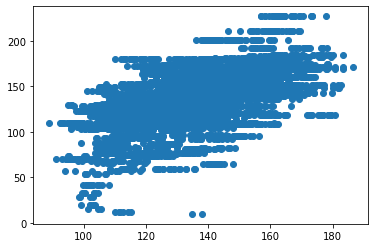

In [70]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)